In [3]:
import math
-(1/3)*math.log(1/3,2)-(2/3)*math.log(2/3,2)

0.9182958340544896

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [8]:
prix=pd.read_csv("data/Weed_Price.csv")
demo=pd.read_csv("data/Demographics_State.csv")
population=pd.read_csv("data/Population_State.csv")

In [12]:
#type des dataset
print(type(prix))
print(type(demo))
print(type(population))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [13]:
prix.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [15]:
prix.tail()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
22887,Rhode Island,317.15,721,259.16,559,NaN,47,2014-12-31
22888,South Carolina,336.98,1683,205.78,1412,NaN,163,2014-12-31
22889,South Dakota,357.05,222,348.81,256,NaN,25,2014-12-31
22890,Tennessee,348.95,2241,225.56,1910,NaN,219,2014-12-31
22891,Texas,334.18,8236,233.58,8573,NaN,1147,2014-12-31
22892,Utah,290.42,959,238.08,1055,NaN,62,2014-12-31
22893,Vermont,371.23,357,308.86,367,NaN,32,2014-12-31
22894,Virginia,364.98,3513,293.12,3079,NaN,284,2014-12-31
22895,Washington,233.05,3337,189.92,3562,NaN,160,2014-12-31
22896,West Virginia,359.35,551,224.03,545,NaN,60,2014-12-31


In [17]:
#type de chaque donnée
prix.dtypes

State      object
HighQ     float64
HighQN      int64
MedQ      float64
MedQN       int64
LowQ      float64
LowQN       int64
date       object
dtype: object

In [21]:
prix.shape

(22899, 8)

In [22]:
# .values pour transformer une colonne de dataframe en np array
les_etats=np.unique(prix["State"].values)

In [23]:
print(les_etats)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [25]:
prix.describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
count,22899.000000,22899.000000,22899.000000,22899.000000,12342.000000,22899.000000
mean,329.759854,2274.743657,247.618306,2183.737805,203.747847,202.804489
std,41.173167,2641.936586,44.276015,2789.902626,105.480774,220.531987
min,202.020000,93.000000,144.850000,134.000000,63.700000,11.000000
25%,303.780000,597.000000,215.775000,548.000000,147.117500,51.000000
50%,342.310000,1420.000000,245.800000,1320.000000,186.760000,139.000000
75%,356.550000,2958.000000,274.155000,2673.000000,221.360000,263.000000
max,415.700000,18492.000000,379.000000,22027.000000,734.650000,1287.000000


In [31]:
#trier puiq remplacer les NA/NAN par la médiane de cette colonne (eviter la moyenne sinon valeurs aberantes)
prix.sort_values(['State', 'date'], inplace=True)
prix.fillna(10000)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
20094,Alabama,339.65,1033,198.04,926,147.15,122,2013-12-27
20859,Alabama,339.65,1033,198.04,926,147.15,122,2013-12-28
21573,Alabama,339.75,1036,198.26,929,149.49,123,2013-12-29
22287,Alabama,339.75,1036,198.81,930,149.49,123,2013-12-30
22797,Alabama,339.42,1040,198.68,932,149.49,123,2013-12-31
...,...,...,...,...,...,...,...,...
4997,Wyoming,313.72,148,317.38,226,10000.00,13,2015-06-07
5762,Wyoming,313.72,148,317.38,226,10000.00,13,2015-06-08
6527,Wyoming,313.72,148,317.38,226,10000.00,13,2015-06-09
7343,Wyoming,313.72,148,317.38,226,10000.00,13,2015-06-10


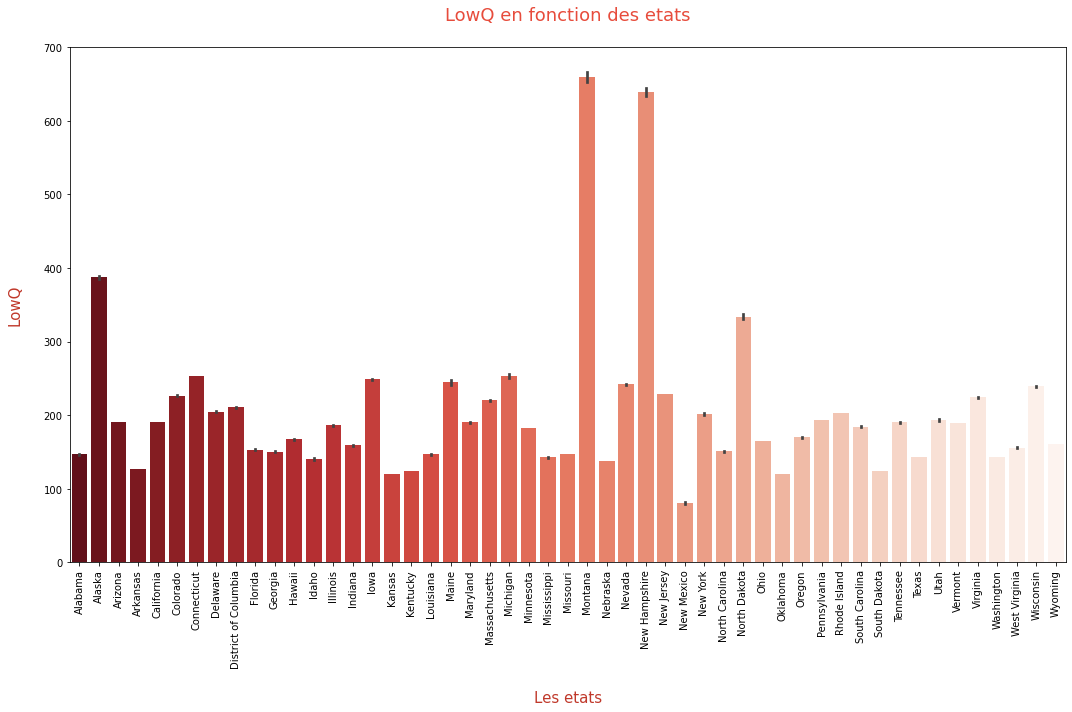

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(x=prix['State'], y=prix['LowQ'], palette="Reds_r")
plt.xlabel('\nLes etats', fontsize=15, color='#c0392b')
plt.ylabel("LowQ\n", fontsize=15, color='#c0392b')
plt.title("LowQ en fonction des etats\n", fontsize=18, color='#e74c3c')
plt.xticks(rotation= 90) #ecriture 
plt.tight_layout()

In [40]:
prix_moyens=prix[["State","LowQ"]].groupby(["State"]).mean()
print(prix_moyens)
print("===========")
prix_moyens=prix_moyens.values
print(prix_moyens)
prix_moyens_app=prix_moyens.ravel() #données applaties
print(prix_moyens_app)

                            LowQ
State                           
Alabama               146.832603
Alaska                387.232727
Arizona               190.826860
Arkansas              127.345455
California            190.795992
Colorado              226.790620
Connecticut           253.024876
Delaware              205.045992
District of Columbia  210.563554
Florida               153.205372
Georgia               150.264091
Hawaii                167.093843
Idaho                 139.962851
Illinois              186.545165
Indiana               158.931653
Iowa                  248.595537
Kansas                120.199256
Kentucky              124.156860
Louisiana             146.776983
Maine                 244.951653
Maryland              190.185083
Massachusetts         220.070000
Michigan              252.644917
Minnesota             182.683306
Mississippi           142.751942
Missouri              147.508595
Montana               659.851074
Nebraska              137.895909
Nevada    

In [48]:
m=min(prix_moyens_app) #np array
M=max(prix_moyens_app)
print(m)
print(M)

80.89095041322314
659.8510743801653


In [49]:
min=1000
max=0
for i in prix_moyens:
    if i > max:
        max=i
    if i<min:
        min=i
print("max=",max)
print("min=",min)

max= [659.85107438]
min= [80.89095041]


In [46]:
effectif=pd.cut(prix_moyens_app,20)
print(effectif)
effectif2=pd.value_counts(effectif)
print(effectif2)
effectif3=effectif2.reindex(effectif.levels)
effectif3.plot(kind='bar')

[(138.787, 167.735], (370.371, 399.319], (167.735, 196.683], (109.839, 138.787], (167.735, 196.683], ..., (196.683, 225.631], (138.787, 167.735], (138.787, 167.735], (225.631, 254.579], (138.787, 167.735]]
Length: 51
Categories (20, interval[float64, right]): [(80.312, 109.839] < (109.839, 138.787] < (138.787, 167.735] < (167.735, 196.683] ... (544.059, 573.007] < (573.007, 601.955] < (601.955, 630.903] < (630.903, 659.851]]
(138.787, 167.735]    15
(167.735, 196.683]    11
(225.631, 254.579]     8
(196.683, 225.631]     6
(109.839, 138.787]     6
(630.903, 659.851]     2
(312.475, 341.423]     1
(80.312, 109.839]      1
(370.371, 399.319]     1
(283.527, 312.475]     0
(341.423, 370.371]     0
(254.579, 283.527]     0
(399.319, 428.267]     0
(428.267, 457.215]     0
(457.215, 486.163]     0
(486.163, 515.111]     0
(515.111, 544.059]     0
(544.059, 573.007]     0
(573.007, 601.955]     0
(601.955, 630.903]     0
dtype: int64


AttributeError: 'Categorical' object has no attribute 'levels'

(array([ 1.,  6., 15., 11.,  6.,  8.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 80.89095041, 109.83895661, 138.78696281, 167.73496901,
        196.68297521, 225.6309814 , 254.5789876 , 283.5269938 ,
        312.475     , 341.4230062 , 370.3710124 , 399.3190186 ,
        428.26702479, 457.21503099, 486.16303719, 515.11104339,
        544.05904959, 573.00705579, 601.95506198, 630.90306818,
        659.85107438]),
 <BarContainer object of 20 artists>)

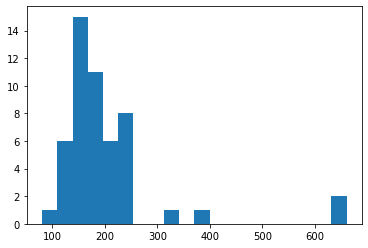

In [50]:
plt.hist(prix_moyens,bins=20)

<AxesSubplot:ylabel='Density'>

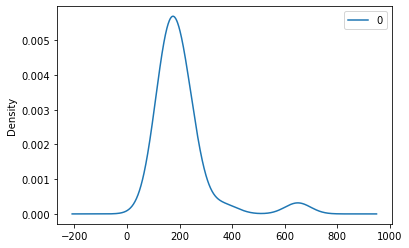

In [51]:
effectif=pd.DataFrame(prix_moyens)
effectif.plot(kind='kde')

<AxesSubplot:>

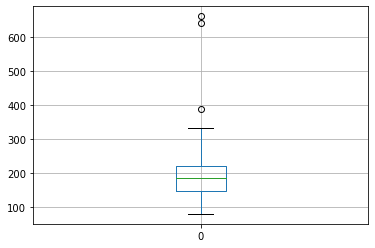

In [59]:
a=pd.DataFrame(prix_moyens)  #un boxplot en pandas 
a.boxplot()

In [55]:
pm_df = pd.DataFrame(prix_moyens, columns=['prix'])  #convertir np array en dataframe
pm_df.describe()

,prix
count,51.000000
mean,203.747847
std,105.749140
min,80.890950
25%,147.170599
50%,186.545165
75%,222.154504
max,659.851074


In [63]:
prix[prix['State'] == 'California'].describe()

,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
count,449.000000,449.000000,449.000000,449.000000,242.000000,449.000000
mean,245.376125,14947.073497,191.268909,16769.821826,190.795992,976.298441
std,1.727046,1656.133565,1.524028,2433.943191,1.586186,120.246714
min,241.840000,12021.000000,187.850000,12724.000000,187.830000,770.000000
25%,244.480000,13610.000000,190.260000,14826.000000,189.420000,878.000000
50%,245.310000,15037.000000,191.570000,16793.000000,191.075000,982.000000
75%,246.220000,16090.000000,192.550000,18435.000000,192.200000,1060.000000
max,248.820000,18492.000000,193.630000,22027.000000,193.880000,1232.000000


In [64]:
prix_ny=prix[prix['State']=='New York']
prix_ca=prix[prix['State']=='California']
prix_ca_ny=prix_ca.merge(prix_ny,on='date')
prix_ca_ny.head()

,State_x,HighQ_x,HighQN_x,MedQ_x,MedQN_x,LowQ_x,LowQN_x,date,State_y,HighQ_y,HighQN_y,MedQ_y,MedQN_y,LowQ_y,LowQN_y
0,California,248.77,12021,193.44,12724,193.88,770,2013-12-27,New York,351.98,5773,268.83,5786,190.31,479
1,California,248.74,12025,193.44,12728,193.88,770,2013-12-28,New York,351.92,5775,268.83,5786,190.31,479
2,California,248.76,12047,193.55,12760,193.60,772,2013-12-29,New York,351.99,5785,269.02,5806,190.75,480
3,California,248.82,12065,193.54,12779,193.80,773,2013-12-30,New York,352.02,5791,268.98,5814,190.75,480
4,California,248.76,12082,193.54,12792,193.80,773,2013-12-31,New York,351.97,5794,268.93,5818,190.75,480


In [73]:
des=prix_ca_ny.describe()

In [76]:
des

,HighQ_x,HighQN_x,MedQ_x,MedQN_x,LowQ_x,LowQN_x,HighQ_y,HighQN_y,MedQ_y,MedQN_y,LowQ_y,LowQN_y
count,449.000000,449.000000,449.000000,449.000000,242.000000,449.000000,449.000000,449.000000,449.000000,449.000000,242.00000,449.000000
mean,245.376125,14947.073497,191.268909,16769.821826,190.795992,976.298441,346.912762,7102.532294,265.376949,7642.091314,201.34000,568.129176
std,1.727046,1656.133565,1.524028,2433.943191,1.586186,120.246714,3.499307,788.659956,1.981911,1130.473193,7.88983,52.163730
min,241.840000,12021.000000,187.850000,12724.000000,187.830000,770.000000,338.260000,5773.000000,260.970000,5786.000000,189.06000,479.000000
25%,244.480000,13610.000000,190.260000,14826.000000,189.420000,878.000000,345.160000,6479.000000,264.240000,6735.000000,190.31000,526.000000
50%,245.310000,15037.000000,191.570000,16793.000000,191.075000,982.000000,347.030000,7093.000000,265.390000,7633.000000,205.36000,567.000000
75%,246.220000,16090.000000,192.550000,18435.000000,192.200000,1060.000000,349.380000,7632.000000,266.610000,8408.000000,206.48750,609.000000
max,248.820000,18492.000000,193.630000,22027.000000,193.880000,1232.000000,352.380000,8902.000000,269.140000,10170.000000,209.46000,683.000000


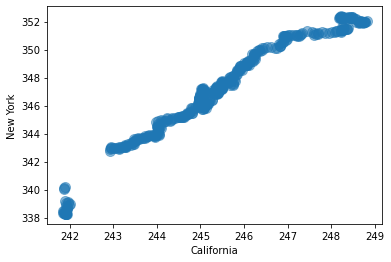

In [66]:
x = prix_ca_ny['HighQ_x'] #ca
y = prix_ca_ny['HighQ_y'] #ny

plt.scatter(x, y, s = 100, alpha=0.5)
plt.xlabel('California')
plt.ylabel('New York')
plt.show()

<AxesSubplot:>

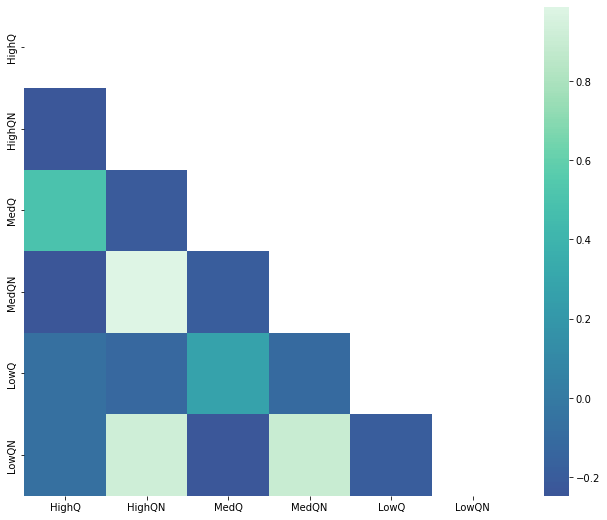

In [81]:
prix_corr=prix.corr()
mask = np.triu(np.ones_like(prix_corr, dtype=bool))
f, ax=plt.subplots(figsize=(11,9))
sns.heatmap(prix_corr, mask=mask, cmap='mako', center=0, square=True)